In [1]:
# breast_cancer_wisconsin_data.csv を取り込む（命令を追記すること）
import pandas as pd
breast_cancer = pd.read_csv('breast_cancer_wisconsin_data.csv')

# 先頭の5行のみ表示する（命令を追記すること）
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


このCSVファイルには30以上の列があります。主要な列のみ、以下に概要を記載します。

- id：連番
- diagnosis："B"か"M"の文字が格納されている（"B"：良性、"M"：悪性）
- radius_mean：中心から外周までの平均距離（半径）
- texture_mean：グレースケール（色の濃さ）の平均値
- perimeter_mean：外周の平均の長さ

今回は `radius_mean`（半径）を説明変数、`diagnosis`（良性か悪性か）を目的変数として回帰を行います。

## 	インポートしたデータを計測データと教師データに分ける

`radius_mean`列で測定データ `X`を、`diagnosis` 列で教師データ `y` を作成してください。また、DataFrame形式から ndarray 形式に変換しましょう。

In [2]:
# X と y を作成する（命令を追記すること）

X_df = breast_cancer.loc[:,["radius_mean"]]
y_df = breast_cancer.loc[:,["diagnosis"]]

import numpy as np
X = X_df.values
y = y_df.values

さて、`y` には "B" もしくは "M" という文字データが入っています。数値化した方がコンピュータは学習しやすくなるので、データの前処理のひとつ「カテゴリの数値化」を実行しましょう。カテゴリの数値化をするには `LabelEncoder` というものを利用します。

[sklearn.preprocessing.LabelEncoder - scikit-learn 0.19 documentation](http://scikit-learn.org/0.19/modules/generated/sklearn.preprocessing.LabelEncoder.html)

※ `LabelEncoder` は、ここまでのレッスンの内容では登場しませんでしたので、以下のコードをそのまま実行いただければ大丈夫です。

# 【課題2】乳がんの腫瘍が良性か悪性かを予測する

## 学習に使うデータセットをインポートする

まずは課題の説明欄に記載したURLから腫瘍の計測データが入ったzipファイルをダウンロードし、解凍してください。
表示された `breast_cancer_wisconsin_data.csv` ファイルを、Cloud9のワークスペース直下（このノートブックと同じディレクトリ）にアップロードします。
アップロードが完了した状態で、下記のコードを実行して、画像のデータセットを読み込んでください。

In [3]:
# カテゴリの数値化
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["B", "M"])                         # 良性：0, 悪性：1
y = le.transform(y.flatten())

# 数値化した状態を確認してみる
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

## 	データを訓練データとテストデータに分ける

`X` および `y` を訓練データとテストデータに分けましょう。その際、訓練データ8割、テストデータ2割としてください。

In [4]:
# 訓練データ8割、テストデータ2割に分割する（命令を追記すること）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)

## 訓練データを用いて予測モデルを作成する

今までの回帰プログラムでは線形分析を利用しました。線形回帰は、ボストンの住宅価格で描いたような直線のグラフになります。

しかし今回は **ロジスティック回帰** を利用します。

[ロジスティック回帰 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0)

ロジスティック回帰は以下の赤線のようなグラフを描くため、`y` が2つの値しか存在しない場合に利用すると良い精度が得られます。

![ml_14.png](https://techacademy.s3.amazonaws.com/bootcamp/python/machine-learning/ml_14.png)

ロジスティック回帰は `LogisticRegression` クラスを利用します。使い方は線形回帰の `LinearRegression` と同じです。コンストラクタで回帰モデルのオブジェクトを作成し、訓練データを指定して `fit()` を実行します。より詳しい情報は公式ドキュメントを参照してください。

[sklearn.linear_model.LogisticRegression - scikit-learn 0.19 documentation](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [5]:
# ロジスティック回帰の回帰モデルを作成する
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# 訓練データを回帰モデルに設定する（命令を追記すること）
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## テストデータを回帰モデルに当てはめて予測を実施する

この回帰モデルを使って予測を実行しましょう。

In [1]:
# 予測を実行する（命令を追記すること）
y_pred = model.predict(X_test)

NameError: name 'model' is not defined

## 結果を表示する

まずは、予測値と実際の値をそのまま表示してください。

In [7]:
# 予測値を表示する（命令を追記すること）
print(y_pred)

[0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0
 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0]


In [8]:
# 実際の値を表示する（命令を追記すること）
print(y_test)

[0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0
 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0]


この機械学習は回帰ではありますが、分類に近いところがありますので、予測の精度を混合行列で示したり、正答率を表示したりすることができます。

In [9]:
# 混合行列で集計結果を表示する（命令を追記すること）
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[78  1]
 [10 25]]


In [10]:
# 正答率を表示する（命令を追記すること）
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.99      0.93        79
          1       0.96      0.71      0.82        35

avg / total       0.91      0.90      0.90       114



最後にグラフを表示してみましょう。

In [11]:
# ロジスティック回帰のグラフを描くために必要な関数と処理。ここの内容は変更しない！
def logit(x, lr):
    return x * lr.coef_ + lr.intercept_

def p(x, lr):
    return 1 / (1 + np.exp(-logit(x, lr)))

import math
X_test_min = math.floor(np.min(X_test))
X_test_max = math.ceil(np.max(X_test))

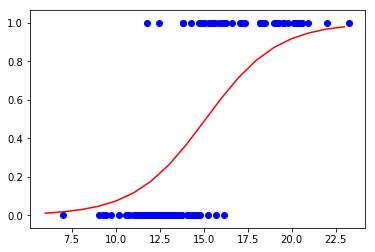

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt

# テストデータを青色の散布図として表示する（命令を追記すること）
plt.scatter(X_test, y_test, color = "blue")

# ロジスティック回帰の曲線グラフを赤色の線で表示する。ここの内容は変更しない！
X_plot = np.arange(X_test_min, X_test_max)
plt.plot(X_plot, p(X_plot, model).flatten(), color = "red")